In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, StrMethodFormatter
import seaborn as sns

In [3]:
df = pd.read_csv('vgsales.csv')

In [13]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [14]:
df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [16]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [18]:
df.isnull().any()

Rank            False
Name            False
Platform        False
Year             True
Genre           False
Publisher        True
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

In [4]:
clean_df = df.dropna()
clean_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [44]:
clean_df['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',
     

In [42]:
clean_df['Publisher'].value_counts().reset_index()

,Publisher,count
0,Electronic Arts,1339
1,Activision,966
2,Namco Bandai Games,928
3,Ubisoft,918
4,Konami Digital Entertainment,823
...,...,...
571,Detn8 Games,1
572,Pow,1
573,Navarre Corp,1
574,MediaQuest,1


In [41]:
clean_df['Genre'].value_counts().reset_index()

,Genre,count
0,Action,3251
1,Sports,2304
2,Misc,1686
3,Role-Playing,1470
4,Shooter,1282
5,Adventure,1274
6,Racing,1225
7,Platform,875
8,Simulation,848
9,Fighting,836


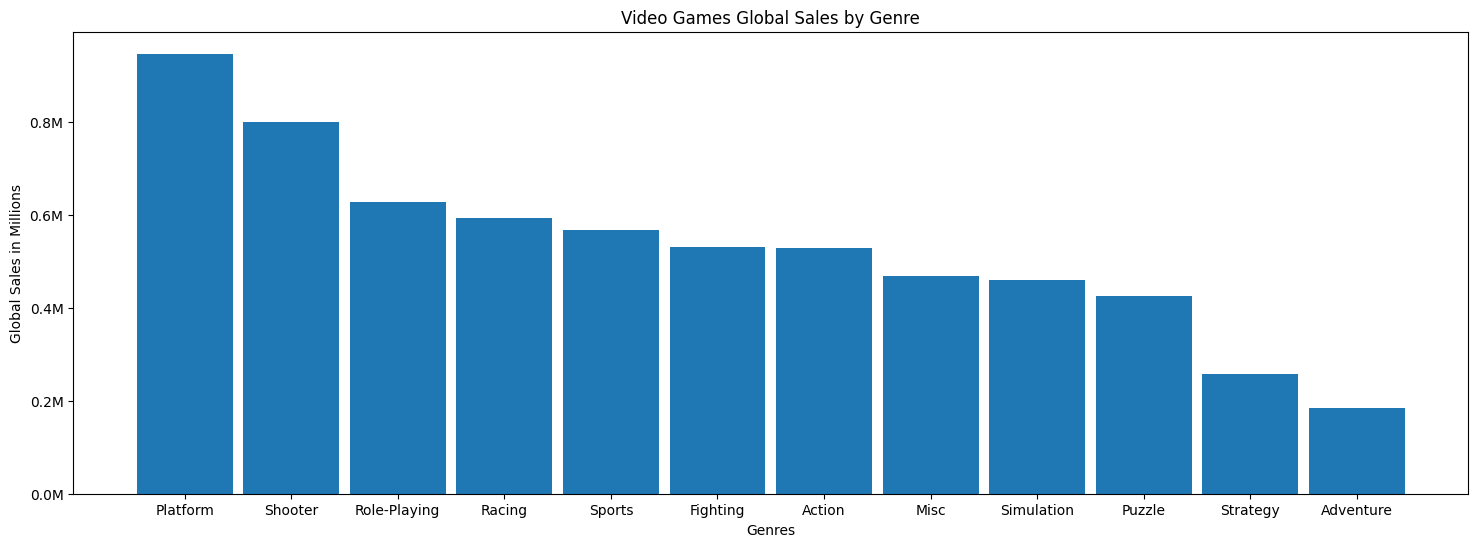

In [6]:
global_sales_by_genre = clean_df.groupby('Genre')[['Global_Sales']].mean().sort_values(by='Global_Sales', ascending=False).reset_index()

plt.figure(figsize=(18,6))
plt.bar(x='Genre', height='Global_Sales', data=global_sales_by_genre, width=0.9)
plt.title('Video Games Global Sales by Genre')
plt.xlabel('Genres')
plt.ylabel('Global Sales in Millions')
plt.gca().yaxis.set_major_formatter('{x:.1f}M')

In [112]:
global_sales_by_year = clean_df.groupby('Year')[['Global_Sales']].sum().reset_index()

/tmp/ipykernel_942/3239716384.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bars.set_xticklabels(global_sales_by_year['Year'].astype(int).astype(str))


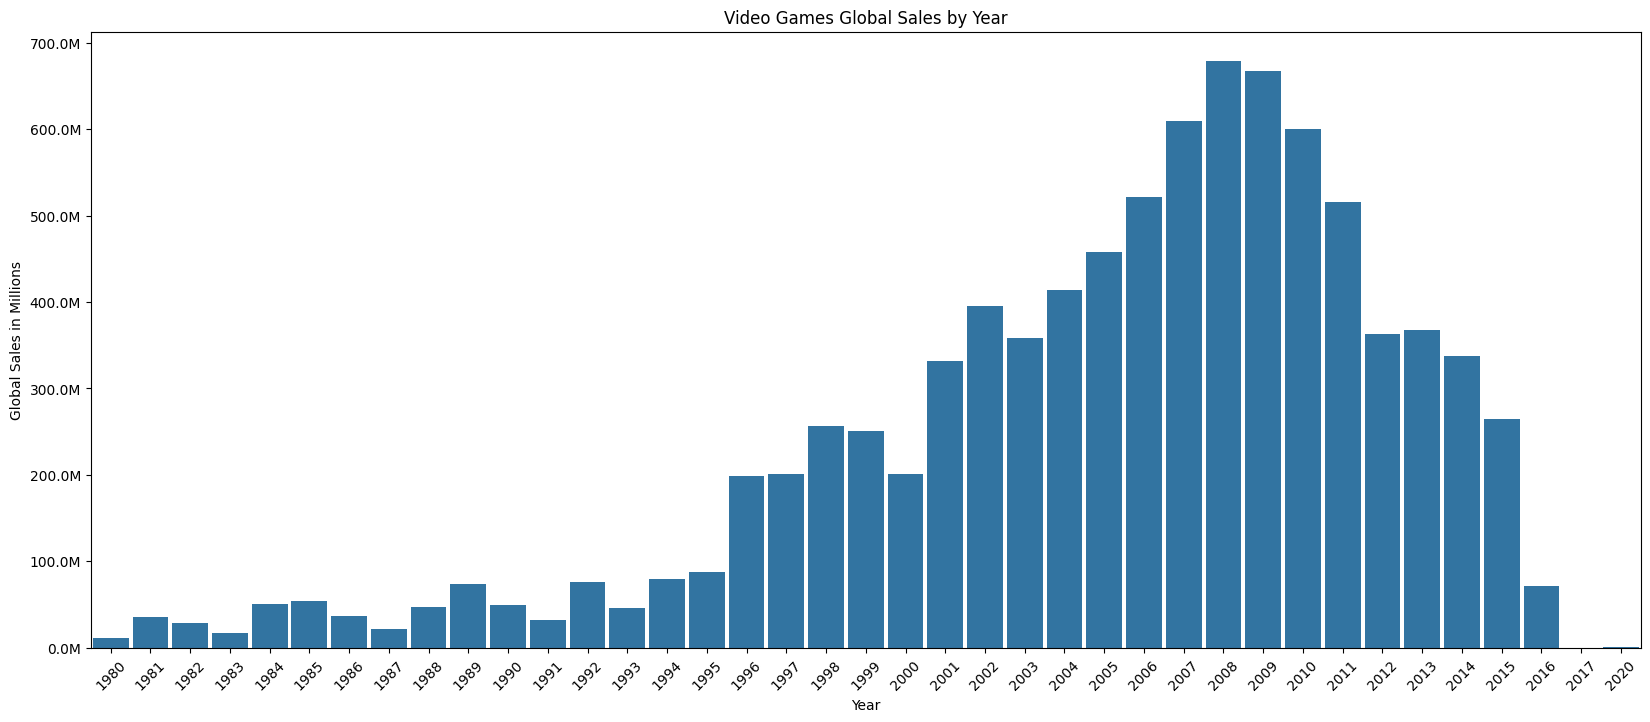

In [113]:

plt.figure(figsize=(20,8))
bars = sns.barplot(data=global_sales_by_year, x=global_sales_by_year['Year'], y='Global_Sales', width=0.9)
plt.title('Video Games Global Sales by Year')
plt.xlabel('Year')
plt.ylabel('Global Sales in Millions')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter('{x:.1f}M')

# set the x labels using the list
bars.set_xticklabels(global_sales_by_year['Year'].astype(int).astype(str))
plt.show()

In [114]:
clean_df2 = clean_df.drop(clean_df[clean_df['Year'] > 2015].index, axis=0)

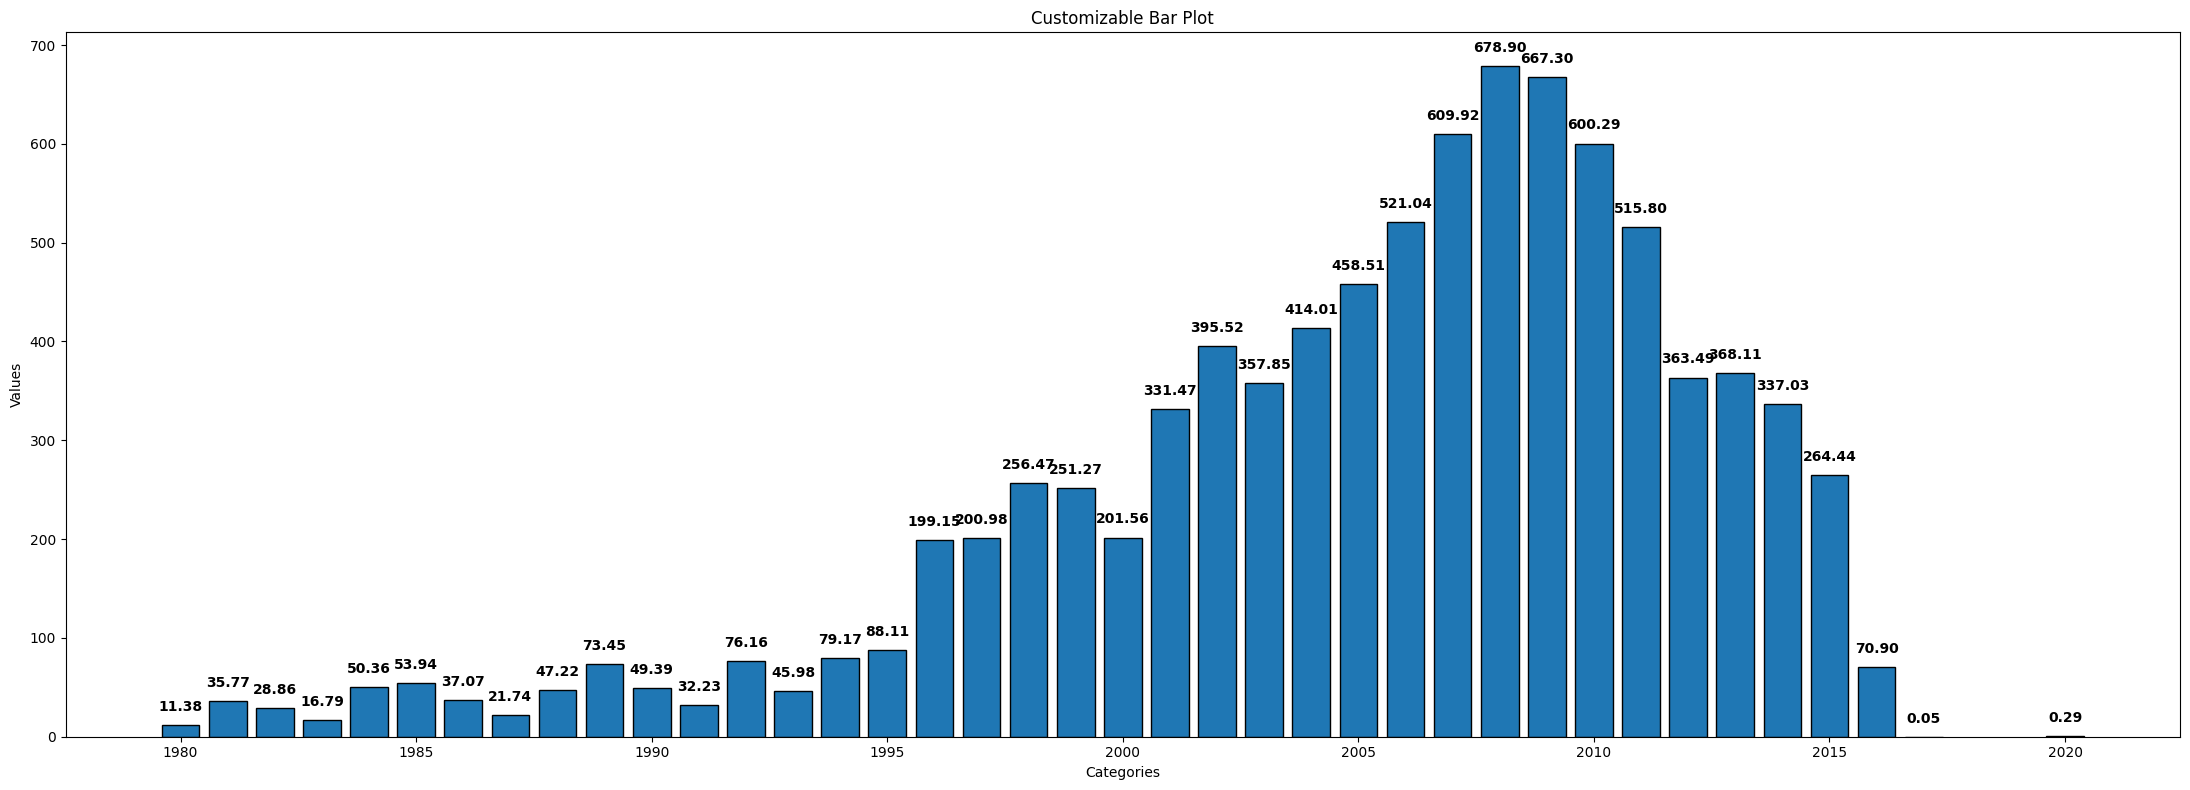

In [120]:
# Customizations
bar_width = 0.8  # Width of the bars
edge_color = 'black'  # Color of the bar edges
title = 'Customizable Bar Plot'
x_label = 'Categories'
y_label = 'Values'

# Plot
plt.figure(figsize=(22,8))
bars = plt.bar(global_sales_by_year['Year'], global_sales_by_year['Global_Sales'], width=bar_width, edgecolor=edge_color)

# Add labels to the bars
plt.bar_label(bars, padding=8, fmt='{:.02f}', fontweight='bold')

# Customize
plt.title(title)
plt.xlabel(x_label)
plt.ylabel(y_label)

# Display
plt.tight_layout()
plt.show()

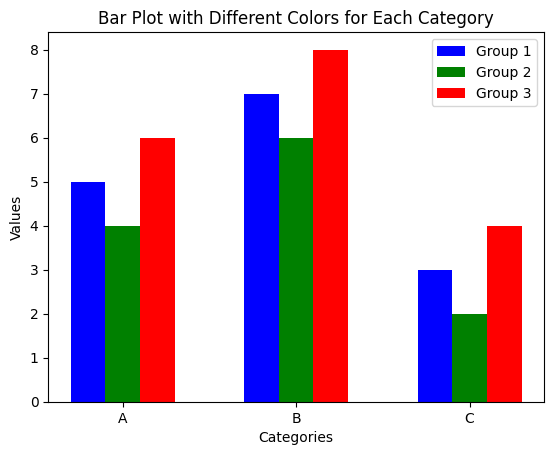

In [75]:
# Sample data
categories = ['A', 'B', 'C']
values1 = [5, 7, 3]
values2 = [4, 6, 2]
values3 = [6, 8, 4]

bar_width = 0.2
x = np.arange(len(categories))

# Plotting bars for each category with different colors
plt.bar(x - bar_width, values1, width=bar_width, label='Group 1', color='b')
plt.bar(x, values2, width=bar_width, label='Group 2', color='g')
plt.bar(x + bar_width, values3, width=bar_width, label='Group 3', color='r')

plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Video Games Sales by Year')
plt.xticks(x, categories)
plt.legend()
plt.show()

In [78]:
all_sales = clean_df2.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum().reset_index()

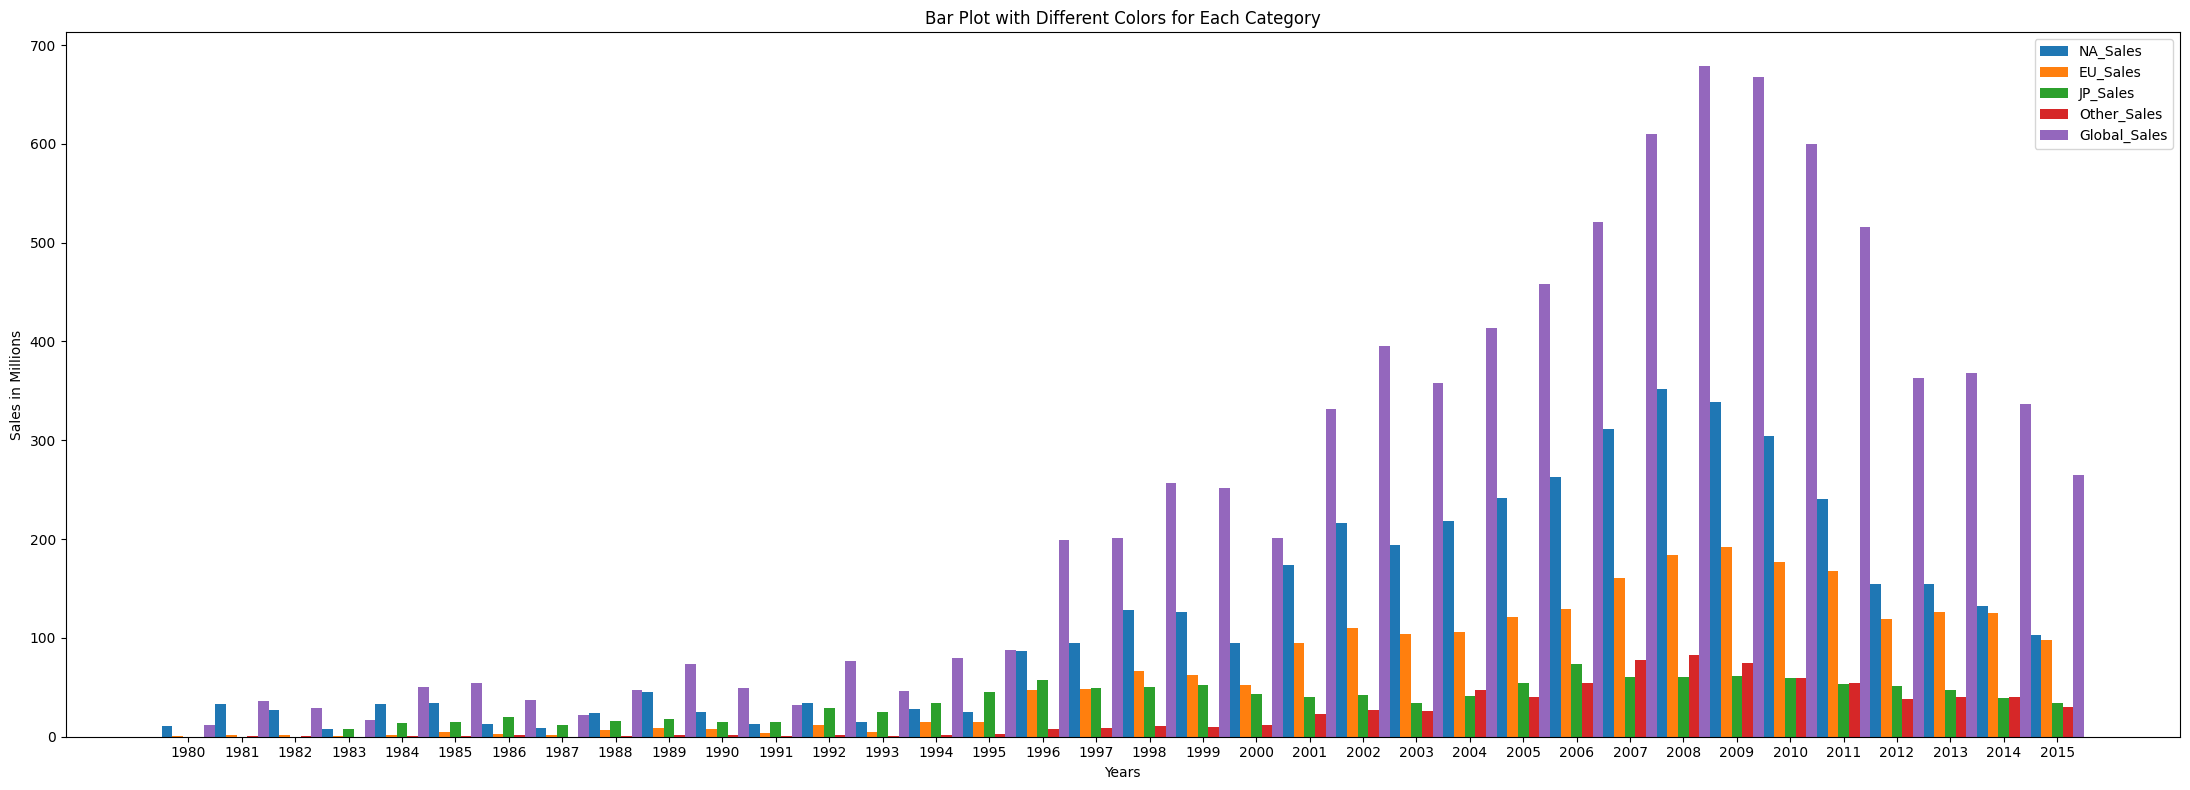

In [99]:
bar_width = 0.2

plt.figure(figsize=(22,8))

plt.bar(all_sales['Year'] - bar_width * 2, all_sales['NA_Sales'], width=bar_width, label='NA_Sales')
plt.bar(all_sales['Year'] - bar_width, all_sales['EU_Sales'], width=bar_width, label='EU_Sales')
plt.bar(all_sales['Year'], all_sales['JP_Sales'], width=bar_width, label='JP_Sales')
plt.bar(all_sales['Year'] + bar_width, all_sales['Other_Sales'], width=bar_width, label='Other_Sales')
plt.bar(all_sales['Year'] + bar_width * 2, all_sales['Global_Sales'], width=bar_width, label='Global_Sales')

plt.xlabel('Years')
plt.ylabel('Sales in Millions')
plt.title('Bar Plot with Different Colors for Each Category')
plt.xticks(all_sales['Year'])
plt.legend()
plt.tight_layout()
plt.show()

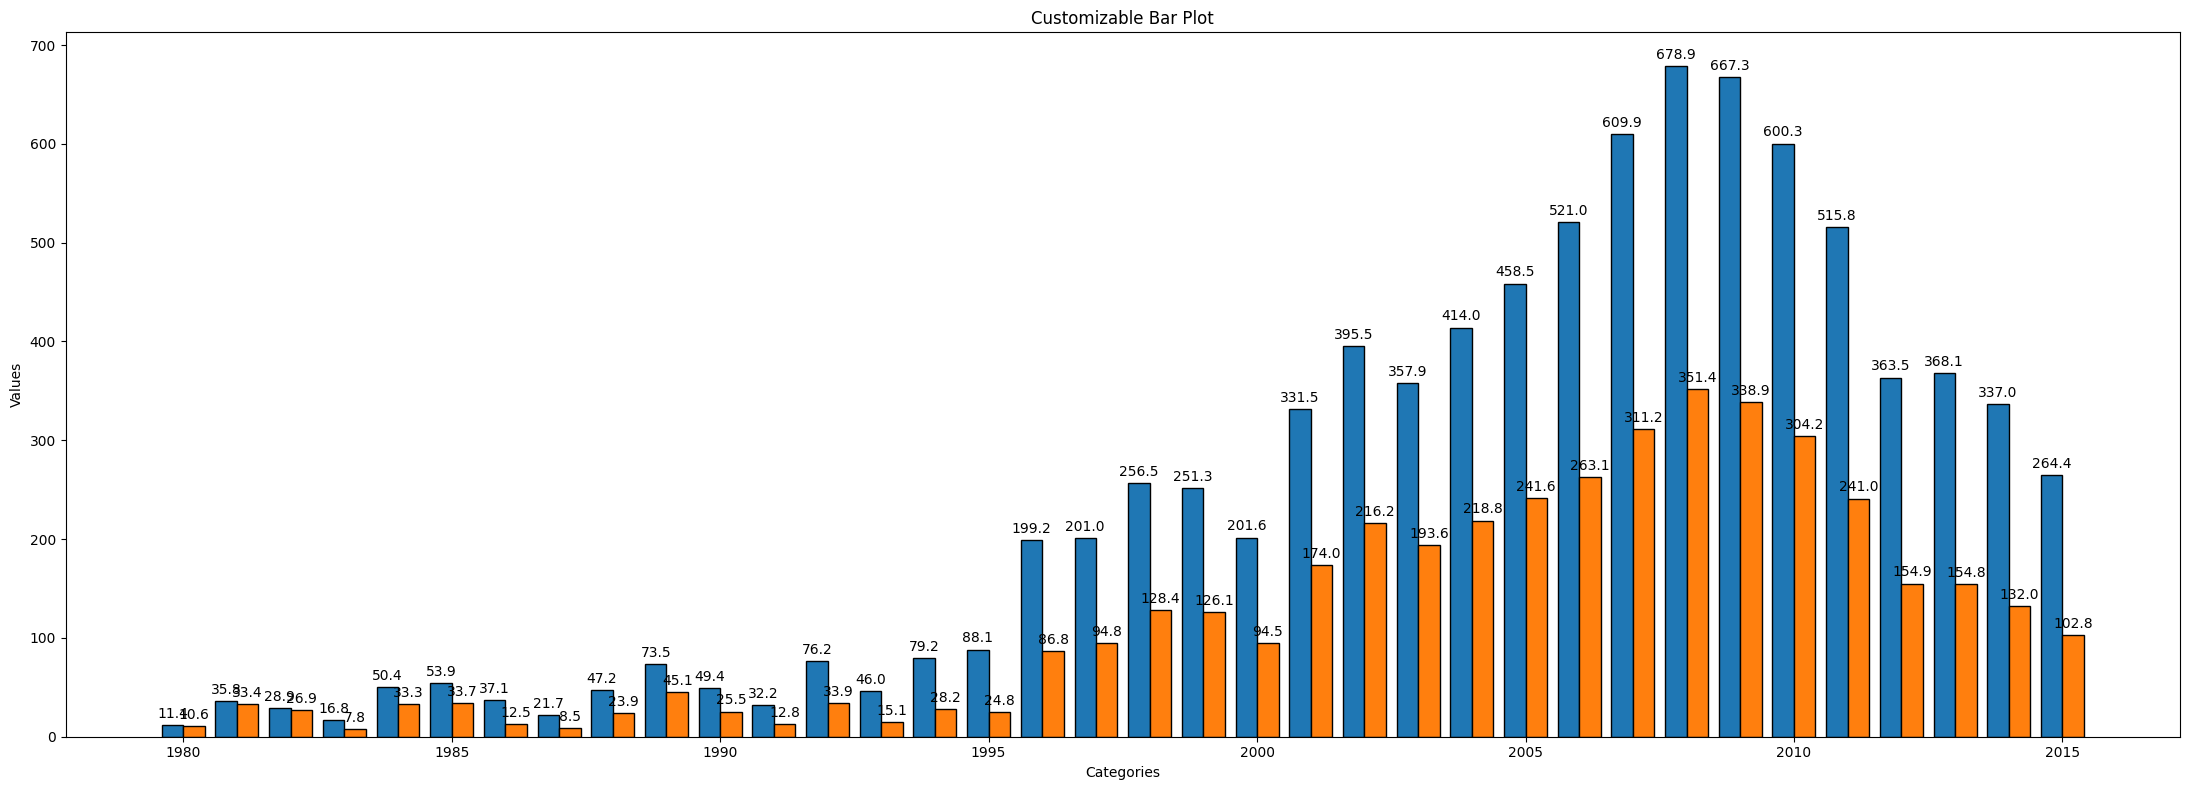

In [133]:
# Customizations
bar_width = 0.4  # Width of the bars
edge_color = 'black'  # Color of the bar edges
title = 'Customizable Bar Plot'
x_label = 'Categories'
y_label = 'Values'

# Plot
plt.figure(figsize=(22,8))
bars = [plt.bar(all_sales['Year'] - bar_width/2, all_sales['Global_Sales'], width=bar_width, edgecolor=edge_color),
        plt.bar(all_sales['Year'] + bar_width/2, all_sales['NA_Sales'], width=bar_width, edgecolor=edge_color)]

# Add labels to the bars
for bar in bars:
    plt.bar_label(bar, padding=3, fmt='{:.1f}')

# Customize
plt.title(title)
plt.xlabel(x_label)
plt.ylabel(y_label)

# Display
plt.tight_layout()
plt.show()